## To Create Notebook 
<p> To create the new notebook command <b> CTRL+SHIFT+P </b>  
</p>

## To create paragrah and bold 
<p> This is paragraph (To edit Click the text and then click the pen icon on the right side of this box) </p>
<b> This is bold </b>

## STEP 1
<p> <b> 1: Import necessary libraries </b></p>

In [31]:
import pandas as pd  # for data reading
import matplotlib.pyplot as plt # for visulization
from mlxtend.frequent_patterns import apriori, association_rules #Association Rule -> to install library run in the terminal "pip install mlxtend"

## STEP 2
<p> <b> Load Dataset </b></p>

In [32]:
df2 = pd.read_csv('bank-additional-full.csv', sep=';')
df2.shape
# one_df = df2[df2['job'] == 'unknown']
# one_df.shape
# # one_df.head()

(41188, 21)

## STEP 3
<p><b>
Read Dataset
</b></p>

In [33]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Step 4
<p><b>
Data Preprocessing : Select relevant columns for association rule mining
</b></p>

In [34]:
# Replace all unknown value with not a valid num(Null) and clean 
df = df2.replace('unknown', pd.NA).dropna()
# # Remove rows where the "job" column has the value "unknown"
# df = df2[df2['job'] != 'unknown'].copy()
# df.head()
# df.shape
df['age_bin'] = pd.cut(df['age'], bins=[0,30,50,100], labels=["young", "middle-aged", "senior"])
df['duration_bin'] = pd.cut(df['duration'], bins=[0, 102, 319, df['duration'].max()], labels=["low", "medium", "high"])


In [35]:
categorical_columns = ['age_bin', 'duration_bin','job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
df_encoded = pd.get_dummies(df[categorical_columns])
print(df_encoded.shape)

(30488, 53)


## Step 5
<p><b>
Read Encoded Dataset
</b></p>

In [36]:
df_encoded.head()

,age_bin_young,age_bin_middle-aged,age_bin_senior,duration_bin_low,duration_bin_medium,duration_bin_high,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,False,False,True,False,True,False,False,False,False,True,...,False,True,False,False,False,False,True,False,True,False
2,False,True,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
3,False,True,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,True,False,True,False
4,False,False,True,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
6,False,False,True,False,True,False,True,False,False,False,...,False,True,False,False,False,False,True,False,True,False


## Step 6
<p><b>
Apply Apriori Algorithm to find frequent itemsets
</b></p>

In [37]:
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

## Step 7
<p><b>
Display the frequent itemsets
</b></p>

In [38]:
# frequent_itemsets.head(30) # remove '#' if u want to show 30 rows
frequent_itemsets.head()

,support,itemsets
0,0.202539,(age_bin_young)
1,0.647337,(age_bin_middle-aged)
2,0.150125,(age_bin_senior)
3,0.247540,(duration_bin_low)
4,0.501050,(duration_bin_medium)


## Step 8
<p><b>
Generate the association rules from the frequent itemsets
</b></p>

In [39]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

## Step 9
<p><b>
Display the association rules
</b></p>

In [40]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(age_bin_young),(duration_bin_medium),0.202539,0.501050,0.103123,0.509150,1.016166,0.001641,1.016502,0.019950
1,(duration_bin_medium),(age_bin_young),0.501050,0.202539,0.103123,0.205813,1.016166,0.001641,1.004123,0.031885
2,(age_bin_young),(duration_bin_high),0.202539,0.251279,0.051824,0.255870,1.018272,0.000930,1.006170,0.022501
3,(duration_bin_high),(age_bin_young),0.251279,0.202539,0.051824,0.206239,1.018272,0.000930,1.004662,0.023966
4,(age_bin_young),(job_admin.),0.202539,0.286572,0.063468,0.313360,1.093479,0.005426,1.039014,0.107200


## Step 10
<p><b>
Interpretation 1 : Filter rules with high confidence and lift for better interpretability
</b></p>

In [41]:
strong_rules = rules[(rules['confidence'] > 0.6) & (rules['lift'] > 1.5)]

# Display the strong rules
strong_rules



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(age_bin_young),(marital_single),0.202539,0.309728,0.132610,0.654737,2.113906,0.069878,1.999262,0.660775
135,(y_yes),(duration_bin_high),0.126574,0.251279,0.078982,0.623996,2.483277,0.047176,1.991257,0.683866
167,(job_management),(education_university.degree),0.075800,0.341511,0.058548,0.772393,2.261690,0.032661,2.893093,0.603606
175,(job_services),(education_high.school),0.093709,0.252526,0.066387,0.708435,2.805401,0.042723,2.563667,0.710086
184,(education_professional.course),(job_technician),0.141728,0.179513,0.090987,0.641981,3.576232,0.065545,2.291741,0.839333
...,...,...,...,...,...,...,...,...,...,...
43362,"(marital_married, month_may, loan_no, y_no, ag...","(poutcome_nonexistent, contact_telephone)",0.110142,0.318256,0.067043,0.608696,1.912595,0.031989,1.742234,0.536209
43569,"(poutcome_nonexistent, housing_no, month_may, ...",(contact_telephone),0.074587,0.329474,0.054021,0.724274,2.198276,0.029447,2.431860,0.589032
43577,"(poutcome_nonexistent, housing_no, month_may, ...","(contact_telephone, loan_no)",0.086132,0.279487,0.054021,0.627190,2.244074,0.029948,1.932653,0.606633
43578,"(poutcome_nonexistent, housing_no, month_may, ...","(contact_telephone, y_no)",0.078719,0.310253,0.054021,0.686250,2.211903,0.029598,2.198396,0.594716


<p> <b>Interpretation 2 : Analysis and interpretation of the rules</b> </p>

In [42]:
# Analysis and interpretation of the rules
# Select and interpret some of the strongest rules
# Rule analysis
for index, rule in strong_rules.iterrows():
    print(f"Rule {index + 1}")
    print(f"Antecedents: {rule['antecedents']}")
    print(f"Consequents: {rule['consequents']}")
    print(f"Support: {rule['support']:.2f}")
    print(f"Confidence: {rule['confidence']:.2f}")
    print(f"Lift: {rule['lift']:.2f}")
    print("--------------------------------------------------")

Rule 7
Antecedents: frozenset({'age_bin_young'})
Consequents: frozenset({'marital_single'})
Support: 0.13
Confidence: 0.65
Lift: 2.11
--------------------------------------------------
Rule 136
Antecedents: frozenset({'y_yes'})
Consequents: frozenset({'duration_bin_high'})
Support: 0.08
Confidence: 0.62
Lift: 2.48
--------------------------------------------------
Rule 168
Antecedents: frozenset({'job_management'})
Consequents: frozenset({'education_university.degree'})
Support: 0.06
Confidence: 0.77
Lift: 2.26
--------------------------------------------------
Rule 176
Antecedents: frozenset({'job_services'})
Consequents: frozenset({'education_high.school'})
Support: 0.07
Confidence: 0.71
Lift: 2.81
--------------------------------------------------
Rule 185
Antecedents: frozenset({'education_professional.course'})
Consequents: frozenset({'job_technician'})
Support: 0.09
Confidence: 0.64
Lift: 3.58
--------------------------------------------------
Rule 378
Antecedents: frozenset({'mo

## Step 11
<p><b>
Demographic visualization using Matplotlib
</b></p>
<p><b>
Distribution of Age types
</b></p>

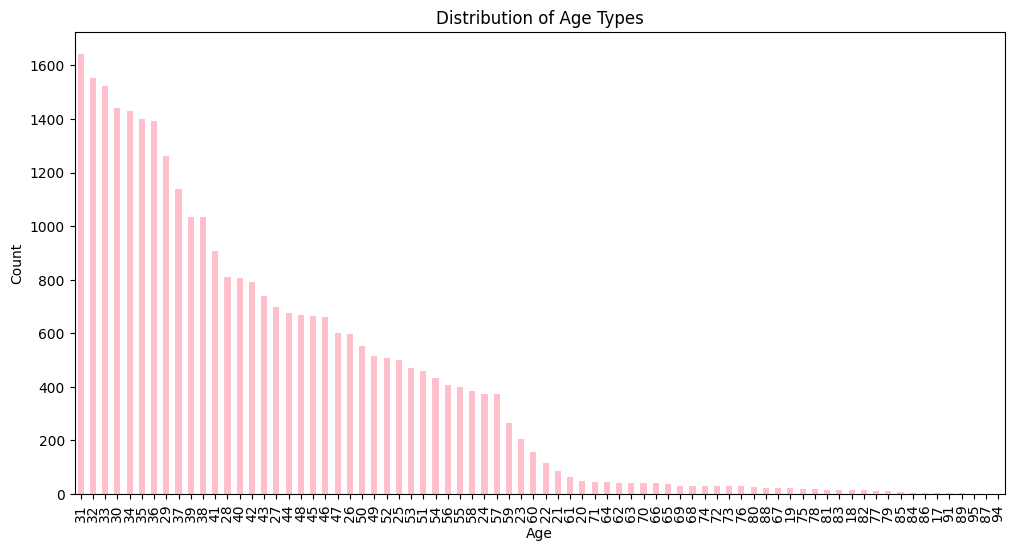

In [43]:
plt.figure(figsize=(12, 6))
df['age'].value_counts().plot(kind='bar', color='pink')
plt.title('Distribution of Age Types')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<p><b>
Distribution of Day of Week types
</b></p>

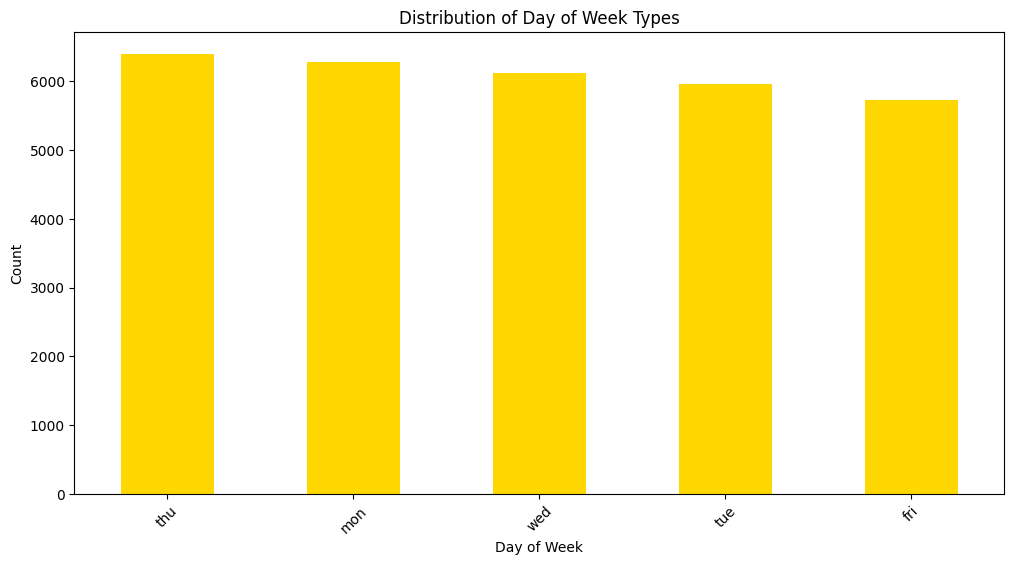

In [44]:
plt.figure(figsize=(12, 6))
df['day_of_week'].value_counts().plot(kind='bar', color='gold')
plt.title('Distribution of Day of Week Types')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<p><b>
Distribution of Day of Contact types
</b></p>

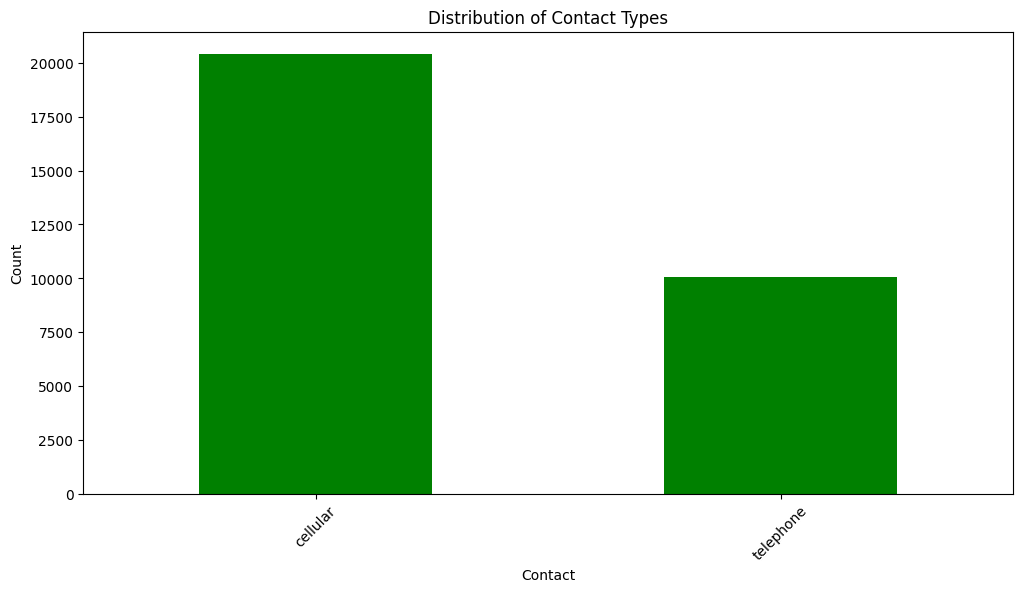

In [45]:
plt.figure(figsize=(12, 6))
df['contact'].value_counts().plot(kind='bar', color='green')
plt.title('Distribution of Contact Types')
plt.xlabel('Contact')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<p><b>
Distribution of Day of Duration types
</b></p>

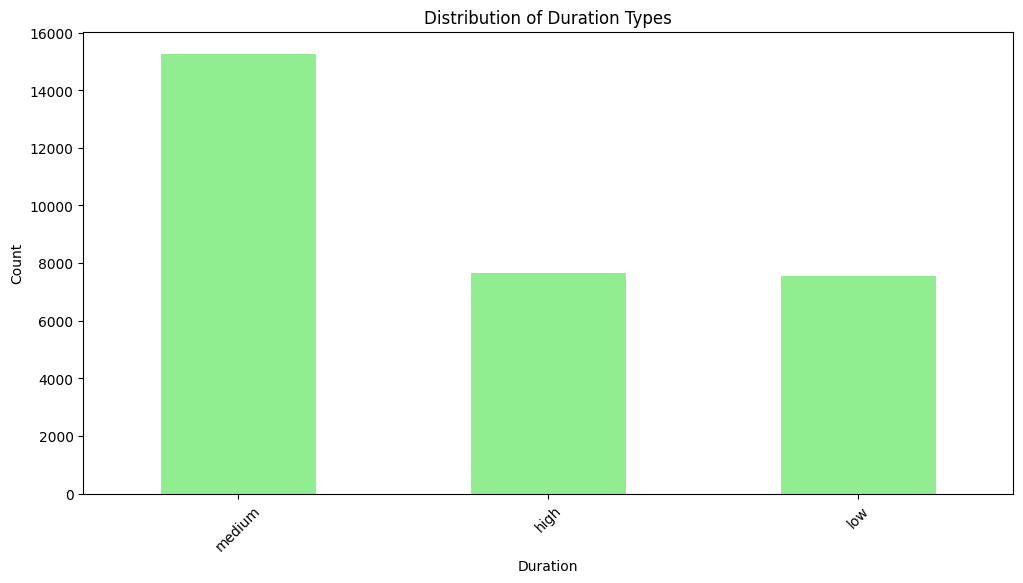

In [51]:
plt.figure(figsize=(12, 6))
df['duration_bin'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Duration Types')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<p><b>
Distribution of Day of poutcome types
</b></p>

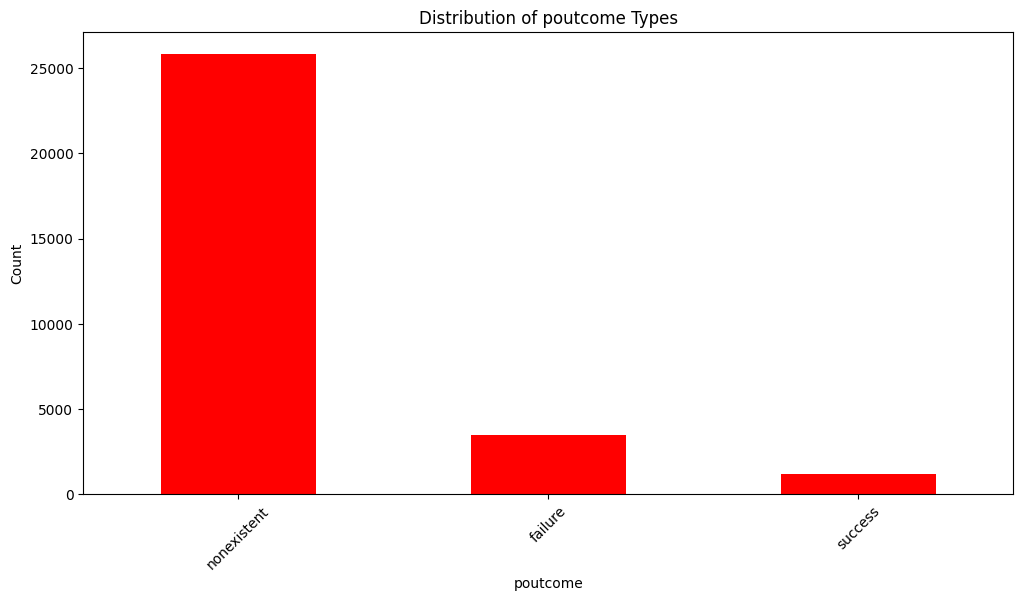

In [47]:
plt.figure(figsize=(12, 6))
df['poutcome'].value_counts().plot(kind='bar', color='red')
plt.title('Distribution of poutcome Types')
plt.xlabel('poutcome')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<p><b>
Distribution of job types
</b></p>

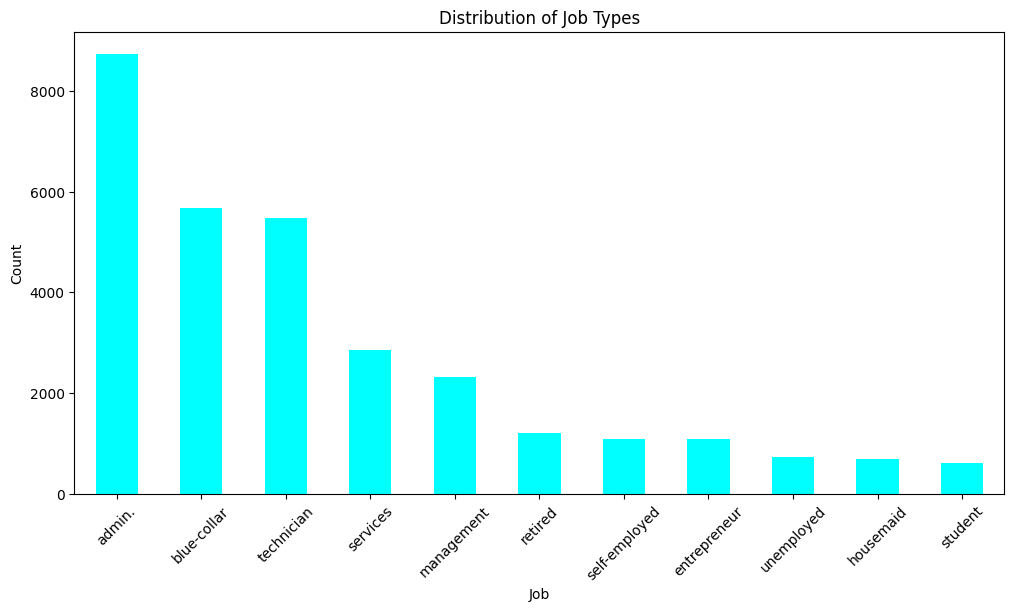

In [48]:
plt.figure(figsize=(12, 6))
df['job'].value_counts().plot(kind='bar', color='cyan')
plt.title('Distribution of Job Types')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<p><b>
Distribution of marital status
</b></p>

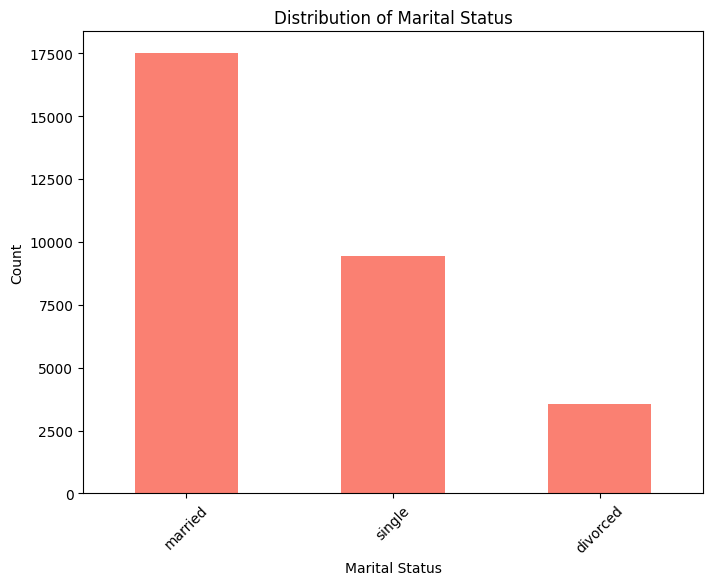

In [49]:
plt.figure(figsize=(8, 6))
df['marital'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<p><b>
Distribution of education levels
</b></p>

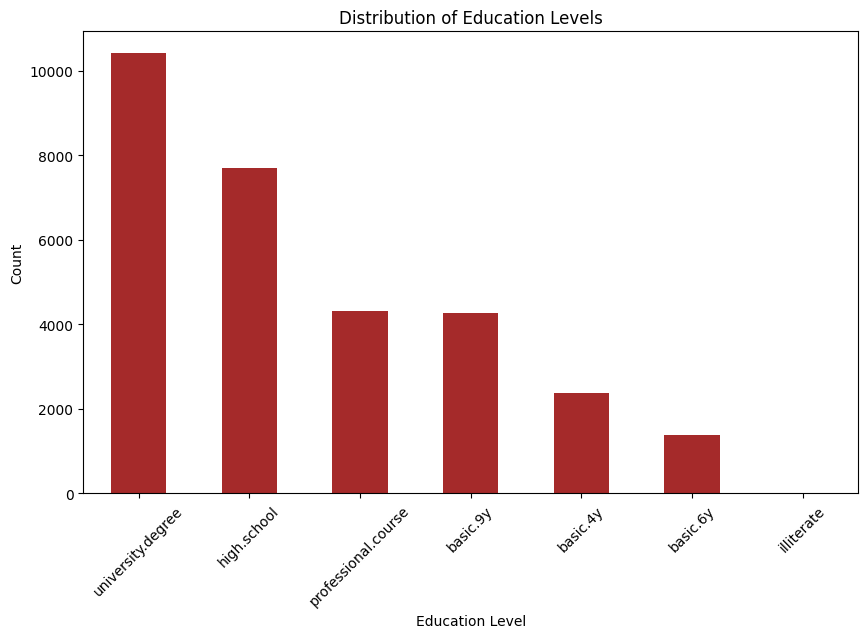

In [50]:
plt.figure(figsize=(10, 6))
df['education'].value_counts().plot(kind='bar', color='brown')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()